In [2]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def download_btc_candles(interval='1h', limit=1000):
    """
    Download BTC candlestick data from Binance.

    Parameters:
        interval (str): The interval for the candlesticks. Options: '1m', '3m', '5m', '15m', '30m', '1h', '2h', '4h',
                        '6h', '8h', '12h', '1d', '3d', '1w', '1M'.
        limit (int): The number of candlesticks to retrieve. Maximum is 1000.

    Returns:
        pandas.DataFrame: A DataFrame containing the candlestick data.
    """
    base_url = 'https://api.binance.com/api/v1/klines'
    params = {
        'symbol': 'BTCUSDT',
        'interval': interval,
        'limit': limit
    }

    response = requests.get(base_url, params=params)
    data = response.json()

    df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time',
                                     'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
                                     'taker_buy_quote_asset_volume', 'ignore'])

    df = df.astype(dtype={'timestamp':str, 'open':float, 'high':float, 'low':float, 'close':float, 'volume':float, 'close_time':float, 'quote_asset_volume':float, 'number_of_trades':float, 'taker_buy_base_asset_volume':float, 'taker_buy_quote_asset_volume':float, 'ignore':float})

    # Convert timestamp to a human-readable date
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df

In [4]:
interval = '1h'
limit = 500
df = download_btc_candles(interval=interval, limit=limit)

C:\Users\gonza\AppData\Local\Temp\ipykernel_11320\2579805373.py:30: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')


In [20]:
df

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2023-06-27 02:00:00,30373.76000000,30496.88000000,30353.48000000,30480.06000000,1299.70052000,1687834799999,39556050.70517610,26886,813.88544000,24772825.80253240,0
1,2023-06-27 03:00:00,30480.07000000,30484.00000000,30363.79000000,30371.57000000,1442.25850000,1687838399999,43887465.51595370,27061,630.44328000,19187608.92294930,0
2,2023-06-27 04:00:00,30371.56000000,30385.00000000,30332.95000000,30348.80000000,940.55778000,1687841999999,28559762.17643240,19586,321.66890000,9766851.24025370,0
3,2023-06-27 05:00:00,30348.81000000,30366.09000000,30247.98000000,30317.90000000,1197.28892000,1687845599999,36293735.88600150,24204,440.32373000,13346985.47431980,0
4,2023-06-27 06:00:00,30317.91000000,30322.00000000,30233.58000000,30320.14000000,785.33529000,1687849199999,23777754.06299460,22717,331.11102000,10025172.37067750,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,2023-07-17 17:00:00,30144.00000000,30159.99000000,29920.00000000,30030.67000000,2742.68881000,1689616799999,82421663.81438060,67752,1147.10626000,34474844.70301150,0
496,2023-07-17 18:00:00,30030.67000000,30060.00000000,29659.20000000,29802.39000000,4222.31153000,1689620399999,126019654.65106620,87483,1794.93290000,53572576.64506300,0
497,2023-07-17 19:00:00,29802.38000000,29934.00000000,29754.31000000,29884.39000000,1833.81010000,1689623999999,54741634.59832020,48144,956.13783000,28542132.70336480,0
498,2023-07-17 20:00:00,29884.40000000,29991.91000000,29881.41000000,29926.19000000,956.21448000,1689627599999,28626694.44589780,27663,454.85658000,13616524.48177660,0


In [5]:
entry_index = df[df.close < 30000].first_valid_index()
df_truncated = df[entry_index:]

In [16]:
df.close < 30000

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496     True
497     True
498     True
499    False
Name: close, Length: 500, dtype: bool

In [6]:
take_profit_index = df_truncated[df.close >= (df.close[entry_index] * 1.05)].first_valid_index()

C:\Users\gonza\AppData\Local\Temp\ipykernel_11320\1872999568.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  take_profit_index = df_truncated[df.close >= (df.close[entry_index] * 1.05)].first_valid_index()


In [13]:
print(f'entry=[{entry_index}], with value = [{df.close[entry_index]}] on date [{df.timestamp[entry_index]}] take_profit=[{take_profit_index}] with value = [{df.close[take_profit_index]}] on date [{df.timestamp[take_profit_index]}]')

entry=[237], with value = [29895.43] on date [2023-07-06 23:01:02.080000] take_profit=[401] with value = [31606.01] on date [2023-07-13 19:00:10.368000]


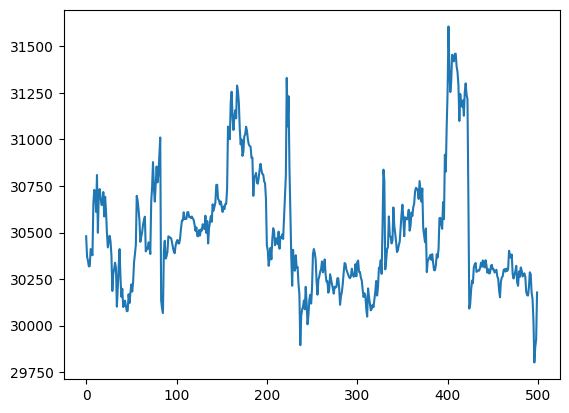

In [11]:
df['close'].plot(x='iteration', y='price')
plt.show()